# Bank Marketing

The data is related to direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to assess if the product (bank term deposit) would be subscribed (or not).

The classification goal is to predict if the client will subscribe to a term deposit (variable y).

### Attribute information
For more information, visit https://www.openml.org/d/1461.

Input variables:

**Bank Client Data**:

1 - age (numeric)

2 - job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur", "student","blue-collar","self-employed","retired","technician","services")

3 - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)

4 - education (categorical: "unknown","secondary","primary","tertiary")

5 - default: has credit in default? (binary: "yes","no")

6 - balance: average yearly balance, in euros (numeric)

7 - housing: has housing loan? (binary: "yes","no")

8 - loan: has personal loan? (binary: "yes","no")

- related with the last contact of the current campaign:

9 - contact: contact communication type (categorical: "unknown","telephone","cellular")

10 - day: last contact day of the month (numeric)

11 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")

12 - duration: last contact duration, in seconds (numeric)

- other attributes:

13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)

15 - previous: number of contacts performed before this campaign and for this client (numeric)

16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

- output variable (desired target):

17 - y - has the client subscribed a term deposit? (binary: "yes","no")

2 = yes; 1 =  no (I am changing this variable so that 1 simply means subscribed)



#### EDA Observations:
 
 - The Bank phone marketing campaign data set has 45,211 rows and 17 columns including the target or Y variable.
 - The dataset is very clean with no null values found
 - Some key features that may be potentially important:
     - **Age**: Mean age is 41 years. Range is from 18 - 95 , mid 50% quartile is 33-48
         - **Hypothesis**: Those under 30 and greater than 60 may have more money to be able to open a deposit account
     - **Average Balance**: Mean balance is 1.3 K Range is -8k to 102K
         - **Hypothesis**: Those with more average balance will likely have money to open a deposit account
     - **Housing Loan/Personal Loan**: Either of these increases the liability.
         - **Hypothesis**:People with loans may not have enough money to open a deposit account
     - **Education**: People with higher education are likely to be high earners and may have enough spare cash to open a deposit account.
     - **Job**: People in management / technical jobs versus students / entrepreneurs / self-employed may have more money to open a deposit account.  Retired folks may be good candidates as well.
          - Reasons we find interesting: It has the most categories in a feature compared to the other features and it is something we can leverage in focusing on certain jobs or removing ones that do not seem significanto
     - **Marital Status**: Singles may have more money versus married with family responsibilities
     - **Contact**: Cellular seems to be resulting in higher conversion rates
          - **Hypothesis**: Those with cellular phones may have more disposable income or calling someone on a cellular phone yields a better chance of response.
     - **Credit Default**: people with credit default may not be the best candidates to open a deposit accountoPrevious campaigns - may have a role in someone deciding to open a deposit account
 - **Potential Issues**: Call Duration appears to be highly correlated. However, it is unknown till the end of the call. We are unsure if we should keep or drop this variable as it is highly correlated, however we won’t know the result unless a marketing call is accepted.
 - **Potential Outliers**: In the box plot for the feature ‘previous’ (which is the number oftimes the client was contacted before the campaign) has an outlier where there is one client who was contacted 273 times would be a feature; we would want to remove outliers for so that our dataset would not be skewed if we wanted to keep the‘previous’ feature for our data processing.

#### Recommended variables to focus on: 
 - Duration: highly correlated but we are unsure if this is a fair variable to use given it is necessary for a contact to be contacted definitely.  If we find that itis a valuable variable this could be something that we consider to keep the customer on the phone longer as that seems to lead to more successful conversions.
 - Job type is also an interesting variable to us, we see that students and retiredworkers are highly correlated so we would want to further investigate this.  Perhaps the students are more educated and willing to subscribe and the retirees have more disposable income.
 - Marital type is an interesting variable as those that are single seem to be highly correlated, perhaps those that are married will invest in something else like college funds.
 - The type of contact also seems to make a difference, those that had cellular phones were more likely to subscribe and this could be for reasons like those that have cellular phones have more discretionary income or it is easier to contact them.
 - Previous outcome success is also an interesting variable and could be used topinpoint who we make our calls to. If we call those we had previous success with first this might increase our marketing power.
 
#### Full Pipeline and Model Deployment Summary:
* We created 7 models with accuracies ranging from ~85-90%, the highest being from the Random Forest.
  - Decision Tree
  - Random Forest
  - SVM
  - XGBoost
  - Naive Bayes
  - KNN
  - Logistic Regression
* Features we used for the models:
  - age
  - balance
  - day 
  - duration 
  - pdays
  - housing
  - month
  - poutcome
  - contact
  - marital
  - default
  - job
  - education

Based on the random forest, duration seems to be the strongest predictor for whether a customer will subscribe or not with a feature importance score of ~34%. This could be due to the fact that customers who are willing to stay longer on the phone with a bank representative have a higher chance of being persuaded to subscribe to a bank deposit.

### EDA

In [618]:
# import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')  # change the default style

In [619]:
# read csv data into pandas dataframe
df = pd.read_csv('projectdataset-1.csv')

In [620]:
# basic shape, data type, null values: dataset looks pretty good.  
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  Class      45211 non-null  int64 
dtypes: int64(8), object(9)
memory usage: 5.9+ MB


In [621]:
# first 5 lines of data
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Class
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,1
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,1
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,1
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,1
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,1


In [622]:
# Prepare the data by separating X and y
# dropping Y variable

# axis = 1 below means dropping by columns, 0 means by rows
df.Class.replace((1,2),(0,1), inplace=True)

X = df.drop(['Class'], axis=1)
y = df['Class']
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
dtypes: int64(7), object(9)
memory usage: 5.5+ MB


In [623]:
# Split the data into a training set and a test set. 
# Any number for the random_state is fine, see 42: https://en.wikipedia.org/wiki/42_(number) 
# We choose to use 20% (test_size=0.2) of the data set as the test set.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,test_size=0.2, random_state=42)

print(X_train.shape)
print(X_test.shape)

#Will revise this later in code after some feature engineering

(36168, 16)
(9043, 16)


In [624]:
# basic stats
X_train.describe(include='all')

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
count,36168.000000,36168,36168,36168,36168,36168.00000,36168,36168,36168,36168.000000,36168,36168.000000,36168.000000,36168.000000,36168.000000,36168
unique,NaN,12,3,4,2,NaN,2,2,3,NaN,12,NaN,NaN,NaN,NaN,4
top,NaN,blue-collar,married,secondary,no,NaN,yes,no,cellular,NaN,may,NaN,NaN,NaN,NaN,unknown
freq,NaN,7830,21771,18561,35521,NaN,20182,30355,23465,NaN,11062,NaN,NaN,NaN,NaN,29589
mean,40.892999,NaN,NaN,NaN,NaN,1365.49342,NaN,NaN,NaN,15.817961,NaN,258.506940,2.763935,40.157238,0.581730,NaN
std,10.627075,NaN,NaN,NaN,NaN,3068.54350,NaN,NaN,NaN,8.331980,NaN,259.142445,3.104161,100.162614,2.408766,NaN
min,18.000000,NaN,NaN,NaN,NaN,-8019.00000,NaN,NaN,NaN,1.000000,NaN,0.000000,1.000000,-1.000000,0.000000,NaN
25%,33.000000,NaN,NaN,NaN,NaN,74.00000,NaN,NaN,NaN,8.000000,NaN,103.000000,1.000000,-1.000000,0.000000,NaN
50%,39.000000,NaN,NaN,NaN,NaN,451.00000,NaN,NaN,NaN,16.000000,NaN,180.000000,2.000000,-1.000000,0.000000,NaN
75%,48.000000,NaN,NaN,NaN,NaN,1430.25000,NaN,NaN,NaN,21.000000,NaN,318.000000,3.000000,-1.000000,0.000000,NaN


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ffc0f949eb8>,
      dtype=object)

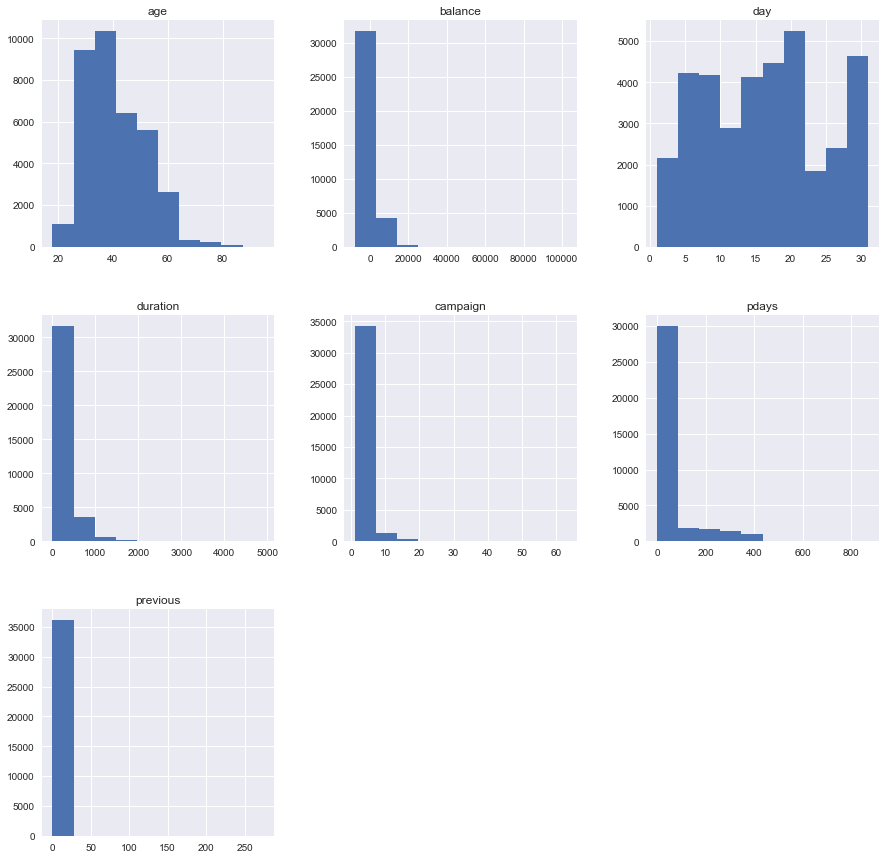

In [625]:
# histograms for all numerical features
X_train.hist(figsize=(15,15))

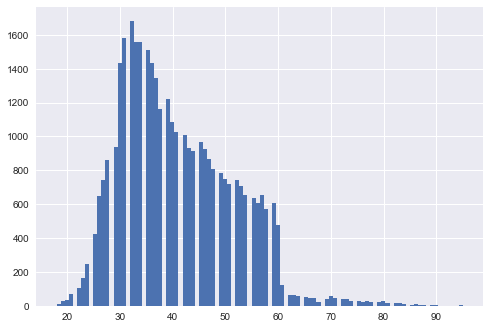

In [626]:
# key findings with potential processing
# long tail (skewed left): log transformation
# some outliers: outlier removal
X_train['age'].hist(bins=100)

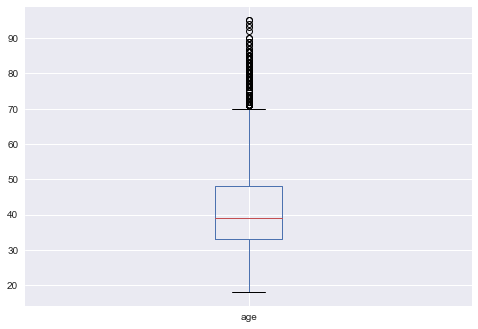

In [627]:
X_train['age'].plot.box()

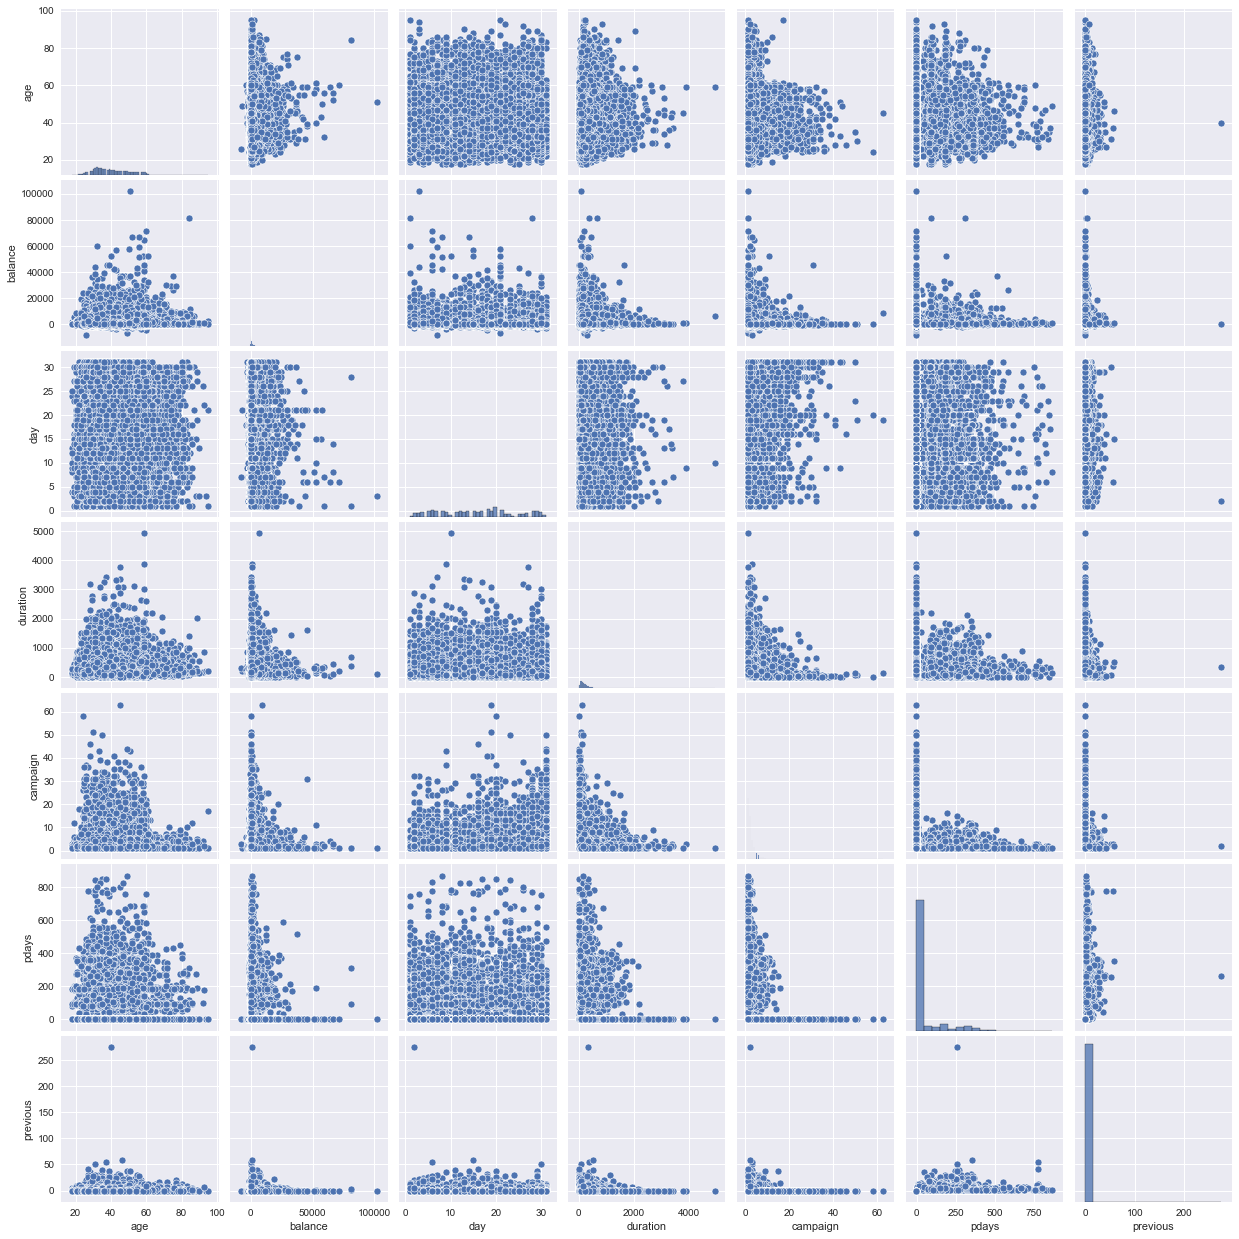

In [628]:
# pairplot example using seaborn
sns.pairplot(data=X_train)

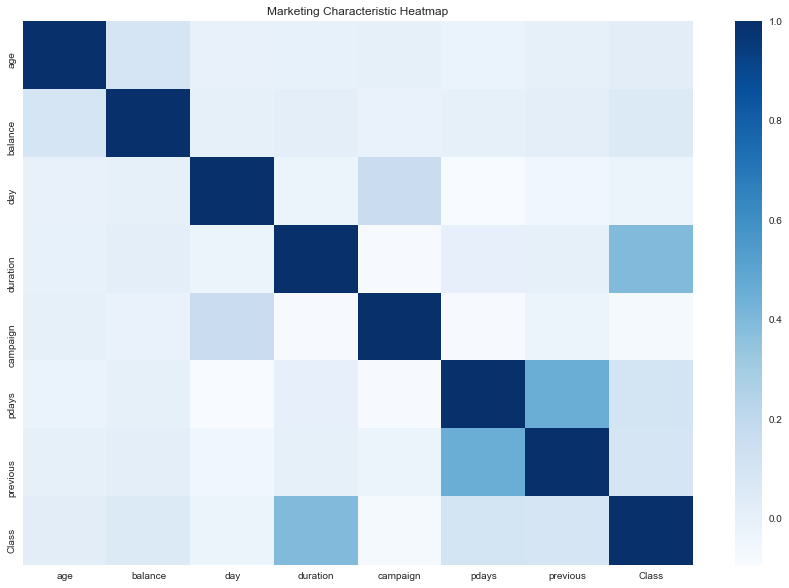

In [629]:
plt.subplots(figsize=(15,10))
ax = plt.axes()
ax.set_title("Marketing Characteristic Heatmap")
corr = df.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
           cmap="Blues")
plt.show()

#For start shows us the duration could be an interesting finding

In [630]:
temp = pd.get_dummies(df.job, drop_first = False, prefix = 'job')
temp.head()

#creating binary output for the types of jobs

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown
0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,0,0
2,0,0,1,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,1


In [631]:
temp2 = pd.get_dummies(df.marital, drop_first = False, prefix = 'marital')
temp2.head()

#creating binary output for the marital status

,marital_divorced,marital_married,marital_single
0,0,1,0
1,0,0,1
2,0,1,0
3,0,1,0
4,0,0,1


In [632]:
temp3 = pd.get_dummies(df.education, drop_first = False, prefix = 'ed')
temp3.head()

#creating binary output for the educational status

,ed_primary,ed_secondary,ed_tertiary,ed_unknown
0,0,0,1,0
1,0,1,0,0
2,0,1,0,0
3,0,0,0,1
4,0,0,0,1


In [633]:
temp4 = pd.get_dummies(df.contact, drop_first = False, prefix = 'contact')
temp4.head()

#creating binary output for the contact status

,contact_cellular,contact_telephone,contact_unknown
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1


In [634]:
temp5 = pd.get_dummies(df.poutcome, drop_first = False, prefix = 'poutcome')
temp5.head()

#creating binary output for the poutcome (outcome of previous marketing campaign) status

,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,0,0,0,1
1,0,0,0,1
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1


In [635]:
# Adding back our new male column into df:
df2 = pd.concat([df, temp,temp2,temp3,temp4,temp5], axis=1)
df2.head()

#concatenating our new columns with original dataset


,age,job,marital,education,default,balance,housing,loan,contact,day,...,ed_secondary,ed_tertiary,ed_unknown,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,...,0,1,0,0,0,1,0,0,0,1
1,44,technician,single,secondary,no,29,yes,no,unknown,5,...,1,0,0,0,0,1,0,0,0,1
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,...,1,0,0,0,0,1,0,0,0,1
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,...,0,0,1,0,0,1,0,0,0,1
4,33,unknown,single,unknown,no,1,no,no,unknown,5,...,0,0,1,0,0,1,0,0,0,1


In [636]:
df2['default'] = df2.default.eq('yes').mul(1)

#relabeling default to 1s for yes instead of yes/no

In [637]:
df2['housing'] = df2.housing.eq('yes').mul(1)

#relabeling housing loan to 1s for yes instead of yes/no

In [638]:
df2['loan'] = df2.loan.eq('yes').mul(1)

#relabeling personal loan to 1s for yes instead of yes/no

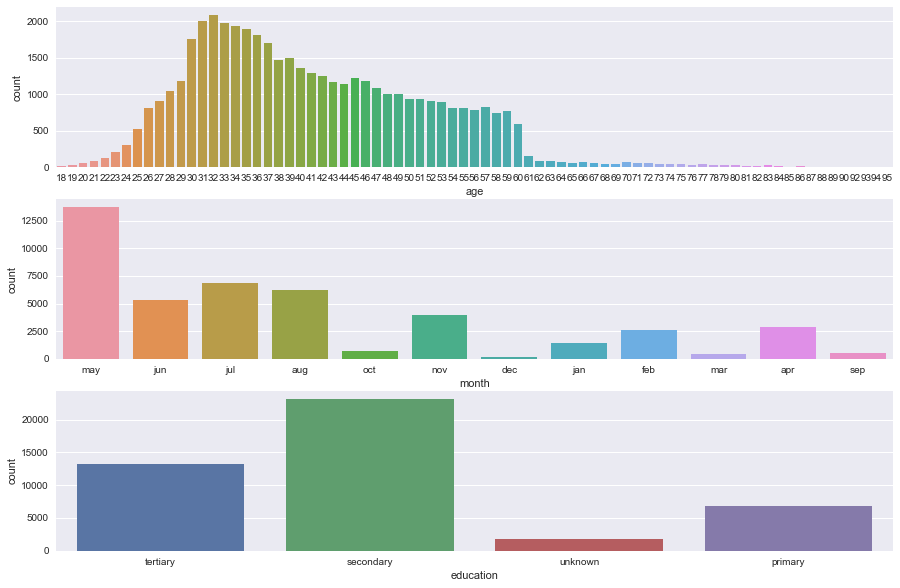

In [639]:
fig, axs = plt.subplots(nrows = 3, ncols = 1, figsize = (15, 10))

sns.countplot(x = "age",data = df, ax=axs[0])
sns.countplot(x = "month", data = df, ax=axs[1])
sns.countplot(x = "education", data = df, ax=axs[2])

#We can see a few graphs that show us a little about the distribution.

In [640]:
df2=df2.replace(to_replace="jan",value=1)
df2=df2.replace(to_replace="feb",value=2)
df2=df2.replace(to_replace="mar",value=3)
df2=df2.replace(to_replace="apr",value=4)
df2=df2.replace(to_replace="may",value=5)
df2=df2.replace(to_replace="jun",value=6)
df2=df2.replace(to_replace="jul",value=7)
df2=df2.replace(to_replace="aug",value=8)
df2=df2.replace(to_replace="sep",value=9)
df2=df2.replace(to_replace="oct",value=10)
df2=df2.replace(to_replace="nov",value=11)
df2=df2.replace(to_replace="dec",value=12)

#Replacing months to numbers to make easier to deal with.


In [641]:
df2.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,...,ed_secondary,ed_tertiary,ed_unknown,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,management,married,tertiary,0,2143,1,0,unknown,5,...,0,1,0,0,0,1,0,0,0,1
1,44,technician,single,secondary,0,29,1,0,unknown,5,...,1,0,0,0,0,1,0,0,0,1
2,33,entrepreneur,married,secondary,0,2,1,1,unknown,5,...,1,0,0,0,0,1,0,0,0,1
3,47,blue-collar,married,unknown,0,1506,1,0,unknown,5,...,0,0,1,0,0,1,0,0,0,1
4,33,unknown,single,unknown,0,1,0,0,unknown,5,...,0,0,1,0,0,1,0,0,0,1


In [642]:
# basic stats
df2.describe(include='all')

,age,job,marital,education,default,balance,housing,loan,contact,day,...,ed_secondary,ed_tertiary,ed_unknown,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
count,45211.000000,45211,45211,45211,45211.000000,45211.000000,45211.000000,45211.000000,45211,45211.000000,...,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
unique,NaN,12,3,4,NaN,NaN,NaN,NaN,3,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,blue-collar,married,secondary,NaN,NaN,NaN,NaN,cellular,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,9732,27214,23202,NaN,NaN,NaN,NaN,29285,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,40.936210,NaN,NaN,NaN,0.018027,1362.272058,0.555838,0.160226,NaN,15.806419,...,0.513194,0.294198,0.041074,0.647741,0.064276,0.287983,0.108403,0.040698,0.033421,0.817478
std,10.618762,NaN,NaN,NaN,0.133049,3044.765829,0.496878,0.366820,NaN,8.322476,...,0.499831,0.455687,0.198464,0.477680,0.245247,0.452828,0.310892,0.197592,0.179735,0.386278
min,18.000000,NaN,NaN,NaN,0.000000,-8019.000000,0.000000,0.000000,NaN,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,33.000000,NaN,NaN,NaN,0.000000,72.000000,0.000000,0.000000,NaN,8.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,39.000000,NaN,NaN,NaN,0.000000,448.000000,1.000000,0.000000,NaN,16.000000,...,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,48.000000,NaN,NaN,NaN,0.000000,1428.000000,1.000000,0.000000,NaN,21.000000,...,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000


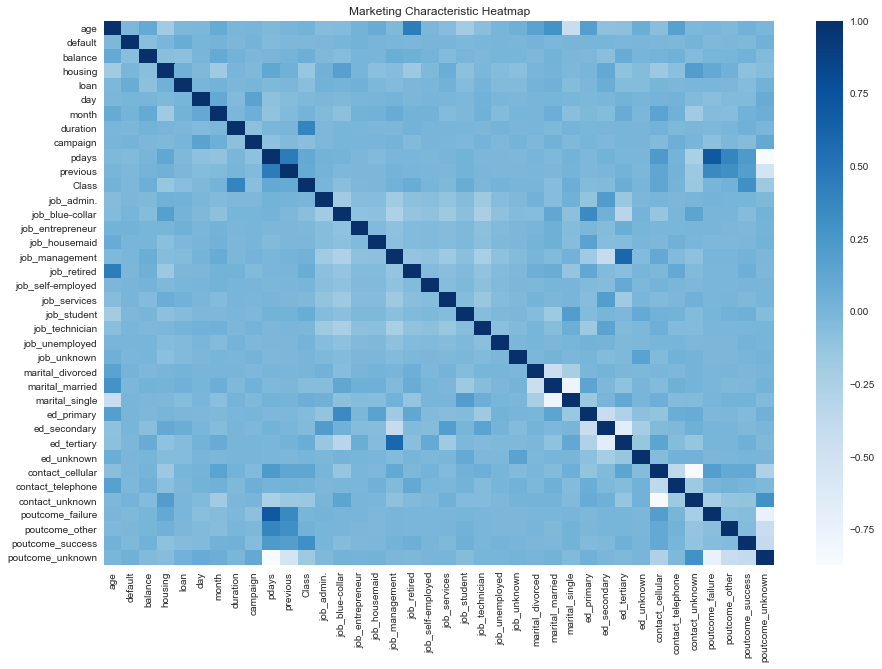

In [643]:
plt.subplots(figsize=(15,10))
ax = plt.axes()
ax.set_title("Marketing Characteristic Heatmap")
corr = df2.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
           cmap="Blues")
plt.show()

#redoing correlation matrix with engineered 

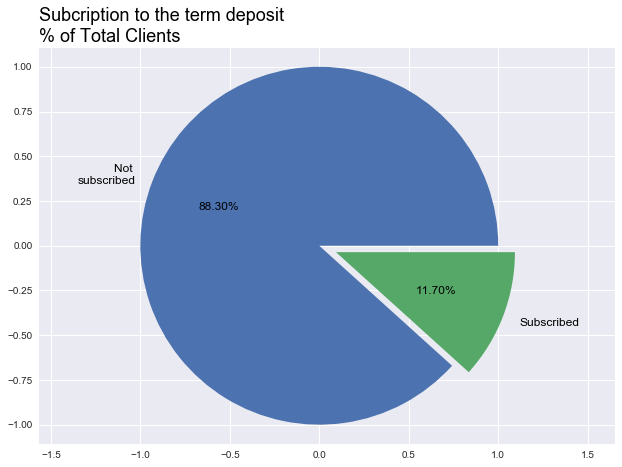

In [644]:
# Pie chart
labels = ["Not \nsubscribed", "Subscribed"]
explode = (0, 0.1)  # only "explode" the second slice (i.e. 'Subscribed')

# depicting the visualization 
fig = plt.figure() 
ax = fig.add_axes([0,0,1,1]) 

ax.pie(df2['Class'].value_counts(), 
       labels = labels,
       explode = explode,
       autopct ='%1.2f%%',
       frame = True,
       textprops = dict(color ="black", size=12)) 

ax.axis('equal') 
plt.title('Subcription to the term deposit\n% of Total Clients',
     loc='left',
     color = 'black', 
     fontsize = '18')

plt.show()

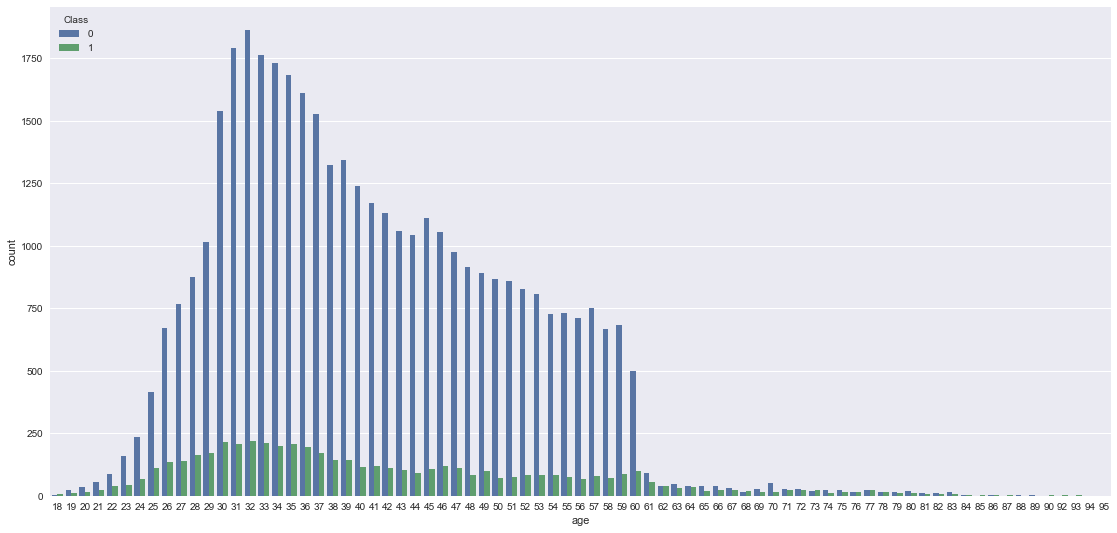

In [645]:
plt.figure(figsize=(19, 9))
sns.countplot(data=df2, x='age', hue='Class')

In [646]:
df2.groupby(["Class"]).mean().transpose() # transpose makes the output easier to read

Class,0,1
age,40.838986,41.670070
default,0.019112,0.009832
balance,1303.714969,1804.267915
housing,0.581008,0.365854
loan,0.169330,0.091511
day,15.892290,15.158253
month,6.128250,6.268482
duration,221.182806,537.294574
campaign,2.846350,2.141047
pdays,36.421372,68.702968


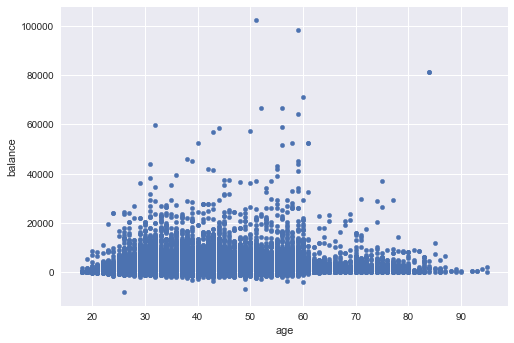

In [647]:
df2.plot(kind = 'scatter', x='age',y='balance')

In [648]:
# basic stats
df2.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,45211,NaN,NaN,NaN,40.9362,10.6188,18,33,39,48,95
job,45211,12,blue-collar,9732,NaN,NaN,NaN,NaN,NaN,NaN,NaN
marital,45211,3,married,27214,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education,45211,4,secondary,23202,NaN,NaN,NaN,NaN,NaN,NaN,NaN
default,45211,NaN,NaN,NaN,0.0180266,0.133049,0,0,0,0,1
balance,45211,NaN,NaN,NaN,1362.27,3044.77,-8019,72,448,1428,102127
housing,45211,NaN,NaN,NaN,0.555838,0.496878,0,0,1,1,1
loan,45211,NaN,NaN,NaN,0.160226,0.36682,0,0,0,0,1
contact,45211,3,cellular,29285,NaN,NaN,NaN,NaN,NaN,NaN,NaN
day,45211,NaN,NaN,NaN,15.8064,8.32248,1,8,16,21,31


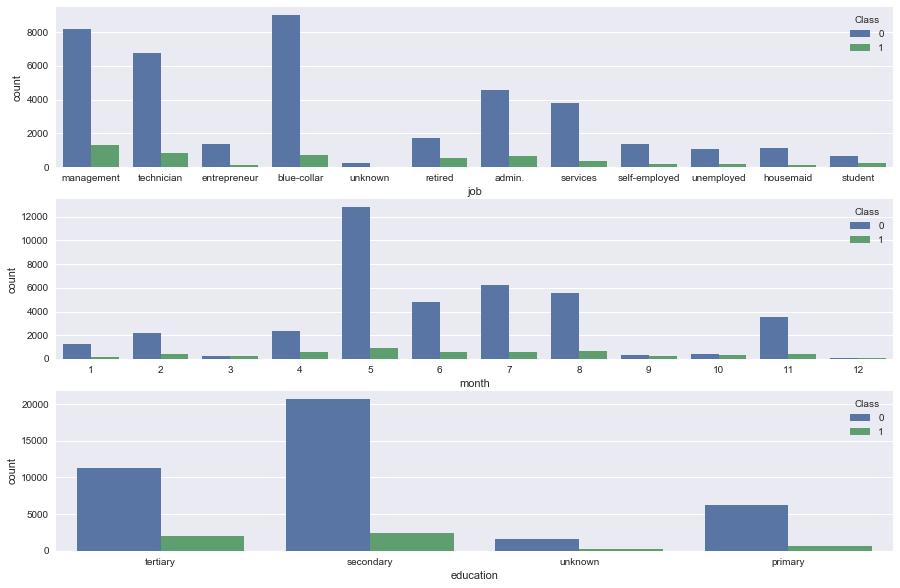

In [649]:
fig, axs = plt.subplots(nrows = 3, ncols = 1, figsize = (15, 10))

sns.countplot(x = "job",data = df2, ax=axs[0],hue="Class")
sns.countplot(x = "month", data = df2, ax=axs[1],hue="Class")
sns.countplot(x = "education", data = df2, ax=axs[2],hue="Class")

### Baseline Prediction

In [650]:
group_norm1 = df2.groupby('contact_cellular')['Class'].value_counts(normalize=True)
print(group_norm1)

group_norm2 = df2.groupby('job_retired')['Class'].value_counts(normalize=True)
print(group_norm2)


contact_cellular  Class
0                 0        0.942233
                  1        0.057767
1                 0        0.850811
                  1        0.149189
Name: Class, dtype: float64
job_retired  Class
0            0        0.888863
             1        0.111137
1            0        0.772085
             1        0.227915
Name: Class, dtype: float64


In [651]:
X_test.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
1392,40,blue-collar,married,primary,no,640,yes,yes,unknown,8,may,347,2,-1,0,unknown
7518,44,technician,married,secondary,no,378,yes,no,unknown,30,may,203,2,-1,0,unknown
12007,31,services,married,secondary,no,356,yes,no,unknown,20,jun,228,5,-1,0,unknown
5536,36,blue-collar,married,primary,no,655,yes,no,unknown,23,may,153,4,-1,0,unknown
29816,34,services,single,secondary,no,1921,yes,no,cellular,4,feb,61,1,-1,0,unknown


In [652]:
# rule-based prediction
baseline_pred = X_test['default'].apply(lambda x: 0 if x == 'no' else 1)


In [653]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, baseline_pred)

print({accuracy_score(y_test, baseline_pred)})

{0.8675218400973128}


We chose accuracy as our evaluation metric and based on our initial run we have a high percentage. These initial findings appear to be driven by loan default, job, duration, and/or contact predictors. We plan to use this accuracy metric as our baseline to compare to other models going forward.

### Data Preprocessing

In [654]:
# We will train our decision tree classifier with the following features:

num_features = ['age', 'balance', 'day', 'duration', 'pdays' ]
cat_features = ['housing','month','poutcome', 'contact']

In [655]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Create the preprocessing pipeline for numerical features
# There are two steps in this pipeline
# Pipeline(steps=[(name1, transform1), (name2, transform2), ...]) 
# NOTE the step names can be arbitrary

# Step 1 is what we discussed before - filling the missing values if any using mean
# Step 2 is feature scaling via standardization - making features look like normal-distributed 
# see sandardization: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)
num_pipeline = Pipeline(
    steps=[
        ('num_imputer', SimpleImputer()),  # we will tune differet strategies later
        ('scaler', StandardScaler()),
        ]
)

# Create the preprocessing pipelines for the categorical features
# There are two steps in this pipeline:
# Step 1: filling the missing values if any using the most frequent value
# Step 2: one hot encoding

cat_pipeline = Pipeline(
    steps=[
        ('cat_imputer', SimpleImputer(strategy='most_frequent')),
        ('onehot', OneHotEncoder()),
    ]
)

# Assign features to the pipelines and Combine two pipelines to form the preprocessor
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer(
    transformers=[
        ('num_pipeline', num_pipeline, num_features),
        ('cat_pipeline', cat_pipeline, cat_features),
    ]
)

### Models

#### Decision Tree

In [656]:
# Specify the model to use, which is DecisionTreeClassifier
# Make a full pipeline by combining preprocessor and the model
from sklearn.tree import DecisionTreeClassifier

pipeline_dt = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('clf_dt', DecisionTreeClassifier()),
    ]
)

In [657]:
# we show how to use GridSearch with K-fold cross validation (K=10) to fine tune the model
# we use the accuracy as the scoring metric with training score return_train_score=True
from sklearn.model_selection import GridSearchCV

# set up the values of hyperparameters you want to evaluate
# here you must use the step names as the prefix followed by two under_scores to sepecify the parameter names and the "full path" of the steps

# we are trying 2 different impputer strategies 
# 2x5 different decision tree models with different parameters
# in total we are trying 2x2x5 = 20 different combinations

param_grid_dt = [
    {
        'preprocessor__num_pipeline__num_imputer__strategy': ['mean', 'median'],
        'clf_dt__criterion': ['gini', 'entropy'], 
        'clf_dt__max_depth': [3, 4, 5, 6, 7],
   
    }
]

# set up the grid search 
grid_search_dt = GridSearchCV(pipeline_dt, param_grid_dt, cv=10, scoring='accuracy')

In [658]:
# train the model using the full pipeline
grid_search_dt.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num_pipeline',
                                                                         Pipeline(steps=[('num_imputer',
                                                                                          SimpleImputer()),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['age',
                                                                          'balance',
                                                                          'day',
                                                                          'duration',
                                                                          'pda

In [659]:
# check the best performing parameter combination
grid_search_dt.best_params_

{'clf_dt__criterion': 'gini',
 'clf_dt__max_depth': 7,
 'preprocessor__num_pipeline__num_imputer__strategy': 'mean'}

In [660]:
# build-in CV results keys
sorted(grid_search_dt.cv_results_.keys())

['mean_fit_time',
 'mean_score_time',
 'mean_test_score',
 'param_clf_dt__criterion',
 'param_clf_dt__max_depth',
 'param_preprocessor__num_pipeline__num_imputer__strategy',
 'params',
 'rank_test_score',
 'split0_test_score',
 'split1_test_score',
 'split2_test_score',
 'split3_test_score',
 'split4_test_score',
 'split5_test_score',
 'split6_test_score',
 'split7_test_score',
 'split8_test_score',
 'split9_test_score',
 'std_fit_time',
 'std_score_time',
 'std_test_score']

In [661]:
# test score for the 20 decision tree models
grid_search_dt.cv_results_['mean_test_score']

array([0.90054734, 0.90054734, 0.90035379, 0.90035379, 0.90220622,
       0.90223387, 0.90093459, 0.90101753, 0.90245525, 0.90239996,
       0.89935853, 0.89935853, 0.89982857, 0.89982857, 0.90121094,
       0.90121094, 0.90107274, 0.90107274, 0.90154288, 0.90148759])

In [662]:
# best decistion tree model test score
grid_search_dt.best_score_

0.9024552506477523

In [663]:
# best test score
print('best dt score is: ', grid_search_dt.best_score_)


best dt score is:  0.9024552506477523


In [664]:
# select the best model
# the best parameters are shown, note SimpleImputer() implies that mean strategry is used
clf_best = grid_search_dt.best_estimator_
clf_best

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num_pipeline',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'balance', 'day',
                                                   'duration', 'pdays']),
                                                 ('cat_pipeline',
                                                  Pipeline(steps=[('cat_imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder())])

In [665]:
# final test on the testing set
# To predict on new data: simply calling the predict method 
# the full pipeline steps will be applied to the testing set followed by the prediction
y_pred = clf_best.predict(X_test)

In [666]:
clf_best.named_steps

{'preprocessor': ColumnTransformer(transformers=[('num_pipeline',
                                  Pipeline(steps=[('num_imputer',
                                                   SimpleImputer()),
                                                  ('scaler', StandardScaler())]),
                                  ['age', 'balance', 'day', 'duration',
                                   'pdays']),
                                 ('cat_pipeline',
                                  Pipeline(steps=[('cat_imputer',
                                                   SimpleImputer(strategy='most_frequent')),
                                                  ('onehot', OneHotEncoder())]),
                                  ['housing', 'month', 'poutcome', 'contact'])]),
 'clf_dt': DecisionTreeClassifier(max_depth=7)}

In [667]:
clf_best.named_steps['preprocessor']

ColumnTransformer(transformers=[('num_pipeline',
                                 Pipeline(steps=[('num_imputer',
                                                  SimpleImputer()),
                                                 ('scaler', StandardScaler())]),
                                 ['age', 'balance', 'day', 'duration',
                                  'pdays']),
                                ('cat_pipeline',
                                 Pipeline(steps=[('cat_imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehot', OneHotEncoder())]),
                                 ['housing', 'month', 'poutcome', 'contact'])])

In [668]:
onehot_columns = list(clf_best.named_steps['preprocessor'].named_transformers_['cat_pipeline'].named_steps['onehot'].get_feature_names(input_features=cat_features))



In [669]:
i = clf_best.named_steps["clf_dt"].feature_importances_
i

array([0.04138105, 0.01392021, 0.02205914, 0.49123509, 0.04750922,
       0.0416941 , 0.00337728, 0.02161304, 0.00142926, 0.        ,
       0.00159478, 0.        , 0.        , 0.00448686, 0.02231354,
       0.00542562, 0.00164968, 0.00903698, 0.00302178, 0.        ,
       0.        , 0.25458985, 0.        , 0.00375056, 0.        ,
       0.00991195])

In [670]:
numeric_features_list = list(num_features)
numeric_features_list.extend(onehot_columns)

In [671]:
print(numeric_features_list)


['age', 'balance', 'day', 'duration', 'pdays', 'housing_no', 'housing_yes', 'month_apr', 'month_aug', 'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep', 'poutcome_failure', 'poutcome_other', 'poutcome_success', 'poutcome_unknown', 'contact_cellular', 'contact_telephone', 'contact_unknown']


In [672]:
import eli5 as eli5
eli5.explain_weights(clf_best.named_steps["clf_dt"], top=50, feature_names=numeric_features_list, feature_filter=lambda x: x != '<BIAS>')

Weight,Feature
0.4912,duration
0.2546,poutcome_success
0.0475,pdays
0.0417,housing_no
0.0414,age
0.0223,month_mar
0.0221,day
0.0216,month_apr
0.0139,balance
0.0099,contact_unknown


In [673]:
r = pd.DataFrame(i, index=numeric_features_list, columns=['importance'])
r

print(r.sort_values('importance', ascending = False))

                   importance
duration             0.491235
poutcome_success     0.254590
pdays                0.047509
housing_no           0.041694
age                  0.041381
month_mar            0.022314
day                  0.022059
month_apr            0.021613
balance              0.013920
contact_unknown      0.009912
month_oct            0.009037
month_may            0.005426
month_jun            0.004487
contact_cellular     0.003751
housing_yes          0.003377
month_sep            0.003022
month_nov            0.001650
month_feb            0.001595
month_aug            0.001429
month_jan            0.000000
month_jul            0.000000
month_dec            0.000000
poutcome_failure     0.000000
poutcome_other       0.000000
poutcome_unknown     0.000000
contact_telephone    0.000000


#### Random Forest

In [10]:
# try random forest classifer
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

# rf pipeline
pipeline_rf = Pipeline([
    ('preprocessor', preprocessor),
    ('clf_rf', RandomForestClassifier()),
])

# here we are trying 2x3 different rf models
param_grid_rf = [
    {
        'clf_rf__criterion': ['gini', 'entropy'], 
        'clf_rf__n_estimators': [50, 100, 150],  
    }
]

# set up the grid search 
grid_search_rf = GridSearchCV(pipeline_rf, param_grid_rf, cv=10, scoring='accuracy')

In [11]:
%%time
# train the model using the full pipeline
grid_search_rf.fit(X_train, y_train)

Wall time: 3min 6s


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num_pipeline',
                                                                         Pipeline(steps=[('num_imputer',
                                                                                          SimpleImputer()),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['age',
                                                                          'balance',
                                                                          'day',
                                                                          'duration',
                                                                          'pda

In [15]:
# best test score
#print('best dt score is: ', grid_search_dt.best_score_)
#print('best svc score is: ', grid_search_svc.best_score_)
print('best rf score is: ', grid_search_rf.best_score_)

best rf score is:  0.9073490840940396


In [16]:
# select the best model
# the best parameters are shown, note SimpleImputer() implies that mean strategry is used
clf_best = grid_search_rf.best_estimator_
clf_best

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num_pipeline',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'balance', 'day',
                                                   'duration', 'pdays']),
                                                 ('cat_pipeline',
                                                  Pipeline(steps=[('cat_imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder())])

In [17]:
clf_best.named_steps

{'preprocessor': ColumnTransformer(transformers=[('num_pipeline',
                                  Pipeline(steps=[('num_imputer',
                                                   SimpleImputer()),
                                                  ('scaler', StandardScaler())]),
                                  ['age', 'balance', 'day', 'duration',
                                   'pdays']),
                                 ('cat_pipeline',
                                  Pipeline(steps=[('cat_imputer',
                                                   SimpleImputer(strategy='most_frequent')),
                                                  ('onehot', OneHotEncoder())]),
                                  ['housing', 'month', 'poutcome', 'contact'])]),
 'clf_rf': RandomForestClassifier(criterion='entropy')}

In [18]:
clf_best.named_steps['preprocessor']

ColumnTransformer(transformers=[('num_pipeline',
                                 Pipeline(steps=[('num_imputer',
                                                  SimpleImputer()),
                                                 ('scaler', StandardScaler())]),
                                 ['age', 'balance', 'day', 'duration',
                                  'pdays']),
                                ('cat_pipeline',
                                 Pipeline(steps=[('cat_imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehot', OneHotEncoder())]),
                                 ['housing', 'month', 'poutcome', 'contact'])])

In [21]:
i = clf_best['clf_rf'].feature_importances_
i

array([0.12128106, 0.1337317 , 0.10659026, 0.34277818, 0.05327213,
       0.01503711, 0.01234927, 0.01362826, 0.01105032, 0.00325788,
       0.00848011, 0.00542346, 0.01050436, 0.01192666, 0.0133105 ,
       0.01110269, 0.00857772, 0.01171398, 0.00726865, 0.00660191,
       0.00404021, 0.04254524, 0.01029849, 0.01197221, 0.00499628,
       0.01826135])

In [22]:
clf_best['preprocessor'].transformers_

[('num_pipeline',
  Pipeline(steps=[('num_imputer', SimpleImputer()), ('scaler', StandardScaler())]),
  ['age', 'balance', 'day', 'duration', 'pdays']),
 ('cat_pipeline',
  Pipeline(steps=[('cat_imputer', SimpleImputer(strategy='most_frequent')),
                  ('onehot', OneHotEncoder())]),
  ['housing', 'month', 'poutcome', 'contact'])]

In [23]:
# get columnTransformer
clf_best[0] 

ColumnTransformer(transformers=[('num_pipeline',
                                 Pipeline(steps=[('num_imputer',
                                                  SimpleImputer()),
                                                 ('scaler', StandardScaler())]),
                                 ['age', 'balance', 'day', 'duration',
                                  'pdays']),
                                ('cat_pipeline',
                                 Pipeline(steps=[('cat_imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehot', OneHotEncoder())]),
                                 ['housing', 'month', 'poutcome', 'contact'])])

In [24]:
clf_best[0].transformers_

[('num_pipeline',
  Pipeline(steps=[('num_imputer', SimpleImputer()), ('scaler', StandardScaler())]),
  ['age', 'balance', 'day', 'duration', 'pdays']),
 ('cat_pipeline',
  Pipeline(steps=[('cat_imputer', SimpleImputer(strategy='most_frequent')),
                  ('onehot', OneHotEncoder())]),
  ['housing', 'month', 'poutcome', 'contact'])]

In [25]:
num_original_feature_names = clf_best[0].transformers_[0][2]
num_original_feature_names

['age', 'balance', 'day', 'duration', 'pdays']

In [26]:
cat_original_feature_names = clf_best[0].transformers_[1][2]
cat_original_feature_names

['housing', 'month', 'poutcome', 'contact']

In [27]:
cat_new_feature_names = list(clf_best[0].transformers_[1][1]['onehot'].get_feature_names(cat_original_feature_names))
cat_new_feature_names

['housing_no',
 'housing_yes',
 'month_apr',
 'month_aug',
 'month_dec',
 'month_feb',
 'month_jan',
 'month_jul',
 'month_jun',
 'month_mar',
 'month_may',
 'month_nov',
 'month_oct',
 'month_sep',
 'poutcome_failure',
 'poutcome_other',
 'poutcome_success',
 'poutcome_unknown',
 'contact_cellular',
 'contact_telephone',
 'contact_unknown']

In [28]:
feature_names = num_original_feature_names + cat_new_feature_names
feature_names

['age',
 'balance',
 'day',
 'duration',
 'pdays',
 'housing_no',
 'housing_yes',
 'month_apr',
 'month_aug',
 'month_dec',
 'month_feb',
 'month_jan',
 'month_jul',
 'month_jun',
 'month_mar',
 'month_may',
 'month_nov',
 'month_oct',
 'month_sep',
 'poutcome_failure',
 'poutcome_other',
 'poutcome_success',
 'poutcome_unknown',
 'contact_cellular',
 'contact_telephone',
 'contact_unknown']

In [29]:
r = pd.DataFrame(i, index=feature_names, columns=['importance'])
r

,importance
age,0.121281
balance,0.133732
day,0.106590
duration,0.342778
pdays,0.053272
housing_no,0.015037
housing_yes,0.012349
month_apr,0.013628
month_aug,0.011050
month_dec,0.003258


In [30]:
r.sort_values('importance', ascending=False)

,importance
duration,0.342778
balance,0.133732
age,0.121281
day,0.106590
pdays,0.053272
poutcome_success,0.042545
contact_unknown,0.018261
housing_no,0.015037
month_apr,0.013628
month_mar,0.013310


<AxesSubplot:>

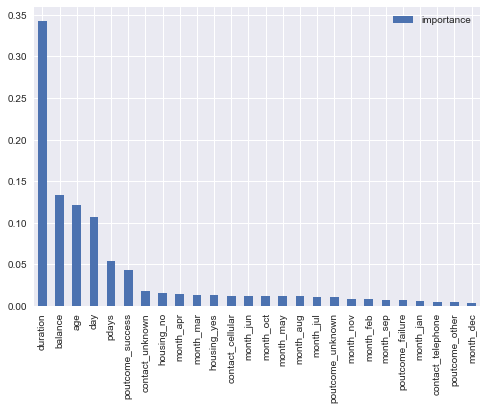

In [31]:
r.sort_values('importance', ascending=False).plot.bar()

In [32]:
# Save the model as a pickle file
import joblib
joblib.dump(clf_best, "clf-best.pickle")

['clf-best.pickle']

In [33]:
# Load the model from a pickle file
saved_tree_clf = joblib.load("clf-best.pickle")
saved_tree_clf

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num_pipeline',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'balance', 'day',
                                                   'duration', 'pdays']),
                                                 ('cat_pipeline',
                                                  Pipeline(steps=[('cat_imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder())])

In [38]:
passenger1 = pd.DataFrame(
     {   'age' : [49],
        'balance' : [-4000],
        'housing': ['no'],
        'contact': ['cellular'], 
        'day' : [7],
        'month' : ['may'],
        'duration' : [1],   
        'pdays' : [2],
        'poutcome' : ['success']
    }
)
passenger1



,age,balance,housing,contact,day,month,duration,pdays,poutcome
0,49,-4000,no,cellular,7,may,1,2,success


In [39]:
# died
pred1 = saved_tree_clf.predict(passenger1)
pred1

array([1], dtype=int64)

In [40]:
onehot_columns = list(clf_best.named_steps['preprocessor'].named_transformers_['cat_pipeline'].named_steps['onehot'].get_feature_names(input_features=cat_features))

In [41]:
numeric_features_list = list(num_features)
numeric_features_list.extend(onehot_columns)

In [42]:
print(numeric_features_list)

['age', 'balance', 'day', 'duration', 'pdays', 'housing_no', 'housing_yes', 'month_apr', 'month_aug', 'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep', 'poutcome_failure', 'poutcome_other', 'poutcome_success', 'poutcome_unknown', 'contact_cellular', 'contact_telephone', 'contact_unknown']


#### SVM

In [43]:
# try SVM classifer
from sklearn.svm import SVC
np.warnings.filterwarnings('ignore') 

# SVC pipeline
pipeline_svc = Pipeline([
    ('preprocessor', preprocessor),
    ('clf_svc', SVC()),
])

# here we are trying three different kernel and three degree values for polynomail kernel
# in total 5 different combinations
param_grid_svc = [
    {
        'clf_svc__kernel': ['linear', 'poly', 'rbf'], 
        'clf_svc__degree': [3, 4, 5],  # only for poly kernel
    }
]

# set up the grid search 
grid_search_svc = GridSearchCV(pipeline_svc, param_grid_svc, cv=10, scoring='accuracy')

In [44]:
# train the model using the full pipeline
grid_search_svc.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num_pipeline',
                                                                         Pipeline(steps=[('num_imputer',
                                                                                          SimpleImputer()),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['age',
                                                                          'balance',
                                                                          'day',
                                                                          'duration',
                                                                          'pda

In [45]:
# best test score
grid_search_svc.best_score_

0.9054690730351511

#### XG Boost

In [79]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

'''
regressor = xgb.XGBRegressor(
    n_estimators=100,
    reg_lambda=1,
    gamma=0,
    max_depth=3
)
'''

model = xgb.XGBClassifier()

pipeline = Pipeline([
    ('standard_scaler', StandardScaler()), 
    ('pca', PCA()), 
    ('model', model)
])

param_grid = {
    'pca__n_components': [5, 10, 15, 20, 25, 30],
    'model__max_depth': [2, 3, 5, 7, 10],
    'model__n_estimators': [10, 100, 500],
}

grid = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1, scoring='roc_auc')

#%%time
grid.fit(X_train_scaled, y_train)

mean_score = grid.cv_results_["mean_test_score"][grid.best_index_]
std_score = grid.cv_results_["std_test_score"][grid.best_index_]

grid.best_params_, mean_score, std_score

print(f"Best parameters: {grid.best_params_}")
print(f"Mean CV score: {mean_score: .6f}")
print(f"Standard deviation of CV score: {std_score: .6f}")

Best parameters: {'model__max_depth': 2, 'model__n_estimators': 100, 'pca__n_components': 20}
Mean CV score:  0.857387
Standard deviation of CV score:  0.006364


#### Logistic Regression

In [500]:
logDf = df.copy()
logDf.Class.replace((1,2),(0,1), inplace=True)

logDf.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Class
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,0


In [501]:
X = logDf[['duration', 'job', 'marital', 'contact', 'education', 'default']].copy()
X = pd.get_dummies(X)
y = logDf['Class'].copy()

In [502]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [503]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

In [504]:
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train_scaled, y_train)

LogisticRegression()

In [505]:
y_pred = pd.Series(model.predict(X_test_scaled))
y_test = y_test.reset_index(drop=True)
z = pd.concat([y_test, y_pred], axis=1)
z.columns = ['True', 'Prediction']
z.head()

,True,Prediction
0,0,0
1,1,1
2,0,0
3,0,0
4,0,0


In [506]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))

Accuracy: 0.8877584872276899
Precision: 0.5666666666666667
Recall: 0.19190968955785512


Text(0.5, 29.5, 'Predicted')

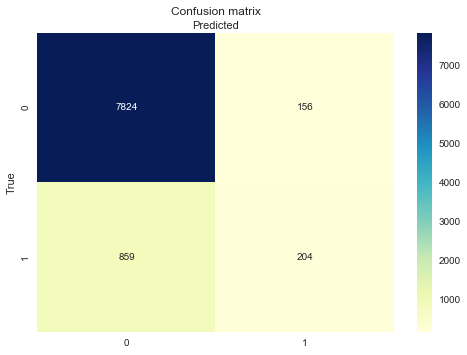

In [507]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

labels = [0, 1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels)
plt.yticks(tick_marks, labels)

sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.title('Confusion matrix', y=1.1)
plt.ylabel('True')
plt.xlabel('Predicted')

* 7824 customers that did not subscribe were correctly predicted as not subscribed.
* 156 customers that did not subscribe were incorrectly predicted as subscribed.
* 859 customers that did subscribe were incorrectly predicted as not subscribed.
* 204 customers that did subscribe were correctly predicted as subscribed.

#### KNN

In [350]:
knnDf = df.copy()
knnDf.Class.replace((1,2),(0,1), inplace=True)

knnDf.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Class
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,0


In [351]:
X = knnDf[['duration', 'job', 'marital', 'contact', 'education', 'default']].copy()
X = pd.get_dummies(X)
y = knnDf['Class'].copy()

In [352]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [353]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

Text(0.5, 29.5, 'Predicted')

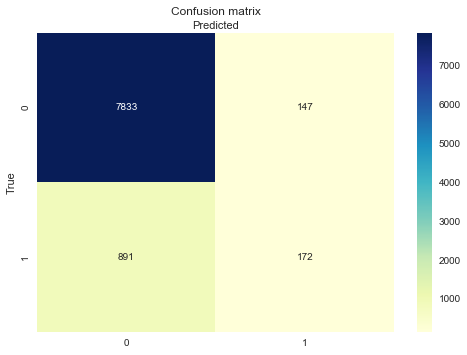

In [354]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

knn = KNeighborsClassifier(n_neighbors=20)

knn.fit(X_train_scaled,y_train)

train_pred = knn.predict(X_train_scaled)
test_pred = knn.predict(X_test_scaled)

cnf_matrix = metrics.confusion_matrix(y_test, test_pred)

labels = [0, 1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels)
plt.yticks(tick_marks, labels)

sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.title('Confusion matrix', y=1.1)
plt.ylabel('True')
plt.xlabel('Predicted')

* 7833 customers that did not subscribe were correctly predicted as not subscribed.
* 147 customers that did not subscribe were incorrectly predicted as subscribed.
* 891 customers that did subscribe were incorrectly predicted as not subscribed.
* 172 customers that did subscribe were correctly predicted as subscribed.

In [355]:
print("KNN Classifcation model accuracy: {:.2f}%".format(knn.score(X_test_scaled, y_test) * 100))

KNN Classifcation model accuracy: 88.52%


#### Naive Bayes

In [87]:
NBdf = df
NBdf.Class.replace((1, 2), ('no', 'yes'), inplace=True)
NBdf.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Class
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


### Features to focus on
* duration - numerical
* job - categorical
* martial - categorical
* contact - categorical
* poutcome - categorical

In [88]:
categorical = [var for var in NBdf.columns if NBdf[var].dtype=='O']

In [89]:
categorical

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome',
 'Class']

In [90]:
numerical = [var for var in NBdf.columns if NBdf[var].dtype!='O']

In [91]:
numerical

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

In [92]:
X = NBdf
X = X.drop(['education', 'default', 'housing', 'loan', 'month', 'Class','age', 'balance', 'day','campaign', 'pdays', 'previous'],axis = 1)
X.columns

Index(['job', 'marital', 'contact', 'duration', 'poutcome'], dtype='object')

In [93]:
y = NBdf['Class']

In [94]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [95]:
import category_encoders as ce

oneHot = ce.OneHotEncoder(cols=X.columns)
X_train = oneHot.fit_transform(X_train)
X_test = oneHot.transform(X_test)

In [96]:
from sklearn.naive_bayes import GaussianNB

bayes = GaussianNB()
bayes.fit(X_train, y_train)

GaussianNB()

In [97]:
y_pred = bayes.predict(X_test)

In [98]:
from sklearn.metrics import accuracy_score

print('Model Accuracy Score is {0:0.4f}'.format(accuracy_score(y_test, y_pred)))

Model Accuracy Score is 0.8546


In [99]:
print('Training-set Accuracy Score is {0:0.4f}'. format(accuracy_score(y_train, bayes.predict(X_train))))

Training-set Accuracy Score is 0.8811


In [100]:
y_test.value_counts()

no     9950
yes    1353
Name: Class, dtype: int64